# From multiple degree-of-freedom to distributed systems: linear strings and sound synthesis 

![](files/w.png)

### Alberto Torin

A.Torin@ed.ac.uk

----

![](files/AAG_Logo.jpg)

In [1]:
% Test sound
DT = 2;          % sound duration (in s)
t = (0:DT*44100)/44100;
y = sin(2*pi*t*440);
soundsc(y , 44100 )

In [2]:
%%html
<style>
    .warning { color: black; 
    background-color: #ffcccc;
    border-color: #ff0000;
    border-left: 10px solid #ff0000;
    padding: 0.5em;
    }
    
    .red {color: red;}
</style>

In [3]:
%plot -s 1000,400

## Outline

---
#### Multiple degree-of-freedom systems
- Equations of motion
- Simple example
- Normal modes and frequencies
---
#### Sound synthesis applications
- Modal approach
- Finite difference approach

# Multiple degree-of-freedom systems

## Mass-spring system with N DOFs

![](files/w.png)
Consider an array of $N$ masses connected by $N+1$ springs, as in the following figure.

![](files/masses.png)

We wish to calculate the equation of motion of the system and do some experiments with it.

## Deriving the equations of motion

![](files/w.png)
Elegant approach by __Prof. Gilbert Strang__, available online at this link:

http://www.courses.com/massachusetts-institute-of-technology/computational-science-and-engineering-i/2

Start from the individual __positions of the masses__, link those to the __elongations of the springs__, which in turn give rise to __forces__ determined by Hooke's law. Then, relate these to the __total force__ acting on each mass and eventually to their __acceleration__. 

Here's a diagram:

<div class="warning">$$\vec{u} \rightarrow \vec{e} \rightarrow \vec{f} \rightarrow \vec{F} \rightarrow \ddot{\vec{u}}$$</div>

Four steps, where each arrow is actually a matrix...

To start, consider 4 masses and 5 springs, but the argument can easily be generalised.

![Array of 4 masses and 5 springs](files/4masses.png)

$${\vec{u} \rightarrow \vec{e}} \rightarrow \vec{f} \rightarrow \vec{F} \rightarrow \ddot{\vec{u}}$$

### 1. Elongations of the springs, $\vec{u} \rightarrow \vec{e}$

![](files/masses_eu.png)

- $e_1 = u_1$
- $e_2 = u_2 - u_1$
- $\dots$
- $e_5 = -u_4$

### 1. Elongations of the springs, $\vec{u} \rightarrow \vec{e}$

Putting everything in matrix form, one can write:

$$ \left[\begin{array}{c} e_1\\ 
e_2 \\ 
e_3 \\
e_4 \\
e_5 \end{array} \right] =
\left[\begin{array}{cccc} 1 & 0 & 0 & 0\\ 
-1 & 1 & 0 & 0 \\ 
0 & -1 & 1 & 0 \\
0 & 0 & -1 & 1\\
0 & 0 & 0 & -1\end{array} \right] \left[\begin{array}{c} u_1\\ 
u_2 \\ 
u_3 \\
u_4 \end{array} \right] \quad \Longrightarrow \quad \vec{e} = A \vec{u}, $$

where the matrix $A$ is rectangular (5x4). 

### 2. Hooke's law, $\vec{e} \rightarrow \vec{f}$

Relate the elongations to the forces acting on the masses using Hooke's law: for each elongation $e_j$, a recall force $f_j$ proportional to $e_j$ is generated. Mathematically, 

$$f_j = - k_j e_j, $$

where $k_j$ is the stiffness constant of the $j$-th spring. 

### 2. Hooke's law, $\vec{e} \rightarrow \vec{f}$

In matrix form, this becomes

$$\left[\begin{array}{c} f_1\\ 
f_2 \\ 
f_3 \\
f_4 \\
f_5 \end{array} \right] = - \left[\begin{array}{ccccc}
k_1 & 0 & 0 & 0 & 0 \\ 
0 & k_2 & 1 & 0 & 0 \\
0 & 0 & k_3 & 0 & 0 \\
0 & 0 & 0 & k_4 & 0 \\
0 & 0 & 0 & 0 & k_5 \\
\end{array} \right] \left[\begin{array}{c} e_1\\ 
e_2 \\ 
e_3 \\
e_4 \\
e_5 \end{array} \right] \quad \Longrightarrow \quad \vec{f} = -C\, \vec{e}
$$

where $C$ is the diagonal square matrix (5x5) of the stiffness coefficients. 

### 3. Resultant force, $\,\vec{f} \rightarrow \vec{F}$

![](files/masses_fF.png)

Calculate the total forces by summing the vectors of the individual spring forces acting on each mass. 

- $F_1 = f_1 - f_2 $
- $F_2 = f_2 - f_3 $
- $\dots$


### 3. Resultant force, $\,\vec{f} \rightarrow \vec{F}$

You can easily see where this is going once we move to matrix notation:

$$\left[\begin{array}{c} F_1\\ 
F_2 \\ 
F_3 \\
F_4 \end{array} \right] = \left[\begin{array}{ccccc} 1 & -1 & 0 & 0 & 0\\ 
0 & 1 & -1 & 0 & 0 \\ 
0 & 0 & 1 & -1 & 0 \\
0 & 0 & 0 & 1 & -1 \end{array} \right] \, \left[\begin{array}{c} f_1\\ 
f_2 \\ 
f_3 \\
f_4 \\
f_5 \end{array} \right] \quad \Longrightarrow \quad \vec{F}= A^T \vec{f} .$$

The interesting fact here is that the matrix we obtain is exactly the transpose of the elongation matrix $A$!

### 4. Newton's law,  $\,\vec{F} \rightarrow \ddot{\vec{u}}$

Each resultant force $F_j$ can be related to the acceleration $\ddot{u}_j$ of the $j$-th mass via Newton's second law,

$$F_j = m_j \ddot{u}_j. $$

### 4. Newton's law,  $\,\vec{F} \rightarrow \ddot{\vec{u}}$

In matrix form

$$ \left[\begin{array}{c} F_1\\ 
F_2 \\ 
F_3 \\
F_4 \end{array} \right] = \left[\begin{array}{cccc}
m_1 & 0 & 0 & 0 \\ 
0 & m_2 & 1 & 0 \\
0 & 0 & m_3 & 0 \\
0 & 0 & 0 & m_4
\end{array} \right] \left[\begin{array}{c} \ddot{u}_1\\ 
\ddot{u}_2 \\ 
\ddot{u}_3 \\
\ddot{u}_4 \end{array} \right] \quad \Longrightarrow \quad \vec{F} = M \ddot{\vec{u}}. $$

### Putting it all together, ${\vec{u} \rightarrow \vec{e}} \rightarrow \vec{f} \rightarrow \vec{F} \rightarrow \ddot{\vec{u}}$

Combine all the previous steps backwards to get the equations of motion: 

$$M \ddot{\vec{u}} = \vec{F} = A^T \vec{f} = -A^T C \, \vec{e} = -A^T C\, A\, \vec{u} .$$

We can rewrite this in a more familiar form as

<div class='warning'>$$ M \ddot{\vec{u}} = -K \vec{u}, \qquad K \equiv A^T C A .$$</div>

## A simple example

![](files/w.png)
Suppose now that all the masses are equal as well as all springs. The above equation simplifies to

$$ \ddot{\vec{u}} = -\omega^2 A^T A \vec{u}, \qquad \omega^2 = k/m .$$

So, accelerations and positions are related by the symmetric matrix $A^T A$... but how does this matrix look like?

### $A$ and $A^T$


$$ A = \left[\begin{array}{cccc} 1 & 0 & 0 & 0\\ 
-1 & 1 & 0 & 0 \\ 
0 & -1 & 1 & 0 \\
0 & 0 & -1 & 1\\
0 & 0 & 0 & -1\end{array} \right], \quad
A^T = \left[\begin{array}{ccccc} 1 & -1 & 0 & 0 & 0\\ 
0 & 1 & -1 & 0 & 0 \\ 
0 & 0 & 1 & -1 & 0 \\
0 & 0 & 0 & 1 & -1 \end{array} \right] $$

### Let's do the math in Matlab

In [4]:
A = [1 0 0 0; -1 1 0 0; 0 -1 1 0; 0 0 -1 1; 0 0 0 -1]

A =

     1     0     0     0
    -1     1     0     0
     0    -1     1     0
     0     0    -1     1
     0     0     0    -1

In [5]:
AT = A'

AT =

     1    -1     0     0     0
     0     1    -1     0     0
     0     0     1    -1     0
     0     0     0     1    -1

In [6]:
D = AT * A

D =

     2    -1     0     0
    -1     2    -1     0
     0    -1     2    -1
     0     0    -1     2

The product of the two matrices $A^T A$ is:

$$ D = \left[\begin{array}{cccc} 2 & -1 & 0 & 0\\ 
-1 & 2 & -1 & 0 \\ 
0 & -1 & 2 & -1 \\
0 & 0 & -1 & 2 \end{array} \right]$$

The matrix $D$, or better its negative version, is particularly important in finite difference applications, as we will see shortly. For the moment, let's investigate the <span class="red">eigenvalues and eigenvectors</span>.

## Eigenvalues and eigenvectors

![](files/w.png)
Suppose we know that a solution of $\ddot{\vec{u}} = -\omega^2 D \vec{u}$ can be written in this form:

$$ \vec{u}(t) = \vec{U} \sin(\Omega t + \phi),$$

where $\vec{U}$ is some constant vector, $\Omega$ a non-negative frequency and $\phi$ the phase. 

Then, the differential equation becomes an eigenvector problem, 

<div class="warning">$$\Omega^2 \vec{U} = \omega^2 D \vec{U}.$$ </div>

### Do the calculations in Matlab

In [7]:
[V,E] = eig(D)

V =

    0.3717   -0.6015   -0.6015   -0.3717
    0.6015   -0.3717    0.3717    0.6015
    0.6015    0.3717    0.3717   -0.6015
    0.3717    0.6015   -0.6015    0.3717


E =

    0.3820         0         0         0
         0    1.3820         0         0
         0         0    2.6180         0
         0         0         0    3.6180

### Add extra immobile masses at the ends

Imagine that we have two extra masses, $m_0$ and $m_5$, at the two ends of the system, held fixed by some invisible agent. 

These correspond to the boundary conditions that we are implicitly applying to the array of masses.

![](files/fixed_masses.png)

In [8]:
V = [zeros(1,4); V; zeros(1,4)]

V =

         0         0         0         0
    0.3717   -0.6015   -0.6015   -0.3717
    0.6015   -0.3717    0.3717    0.6015
    0.6015    0.3717    0.3717   -0.6015
    0.3717    0.6015   -0.6015    0.3717
         0         0         0         0

## Plot the modal shapes

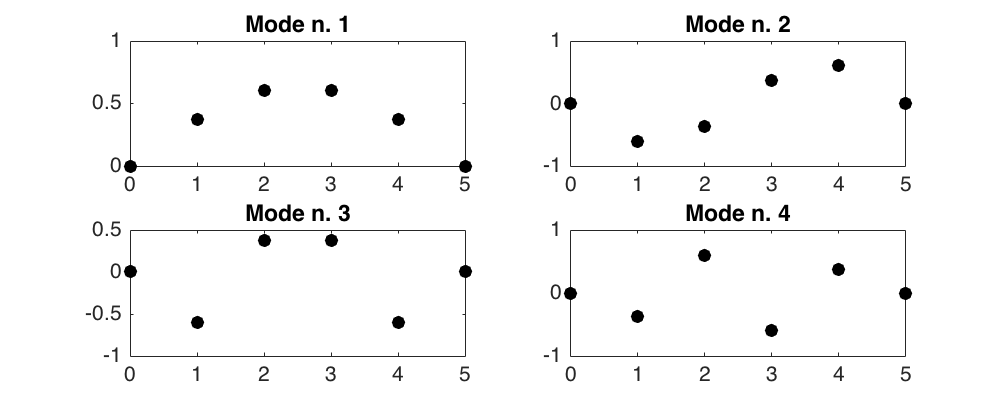

In [9]:
for II=1:4
subplot(2,2,II)
plot(0:5, V(:,II), '.k', 'markersize', 22)
title(['Mode n. ', num2str(II, '%d')])
xlim([0, 5])
end

The modes of this system look suspiciously similar to those of a linear string... Let's see what happens when we increase the number of masses.

First, however, we need a way to generalise the creation of the matrix $D$ to $N$ masses...

### Matlab function that creates $D$

In [10]:
createTridiag = @(N)(full(spdiags(...
        [-ones(N,1), 2*ones(N,1), -ones(N,1)], -1:1, N, N)))

createTridiag = 

    @(N)(full(spdiags([-ones(N,1),2*ones(N,1),-ones(N,1)],-1:1,N,N)))

### Test with N=10

In [11]:
N = 10;
D10 = createTridiag(N)

D10 =

     2    -1     0     0     0     0     0     0     0     0
    -1     2    -1     0     0     0     0     0     0     0
     0    -1     2    -1     0     0     0     0     0     0
     0     0    -1     2    -1     0     0     0     0     0
     0     0     0    -1     2    -1     0     0     0     0
     0     0     0     0    -1     2    -1     0     0     0
     0     0     0     0     0    -1     2    -1     0     0
     0     0     0     0     0     0    -1     2    -1     0
     0     0     0     0     0     0     0    -1     2    -1
     0     0     0     0     0     0     0     0    -1     2

### Array with 10 DOFs

Create the eigenvectors and add the fixed masses.

In [12]:
[V10,E10] = eig(D10);
V10 = [zeros(1,N); V10; zeros(1,N)];

... then plot the modes!

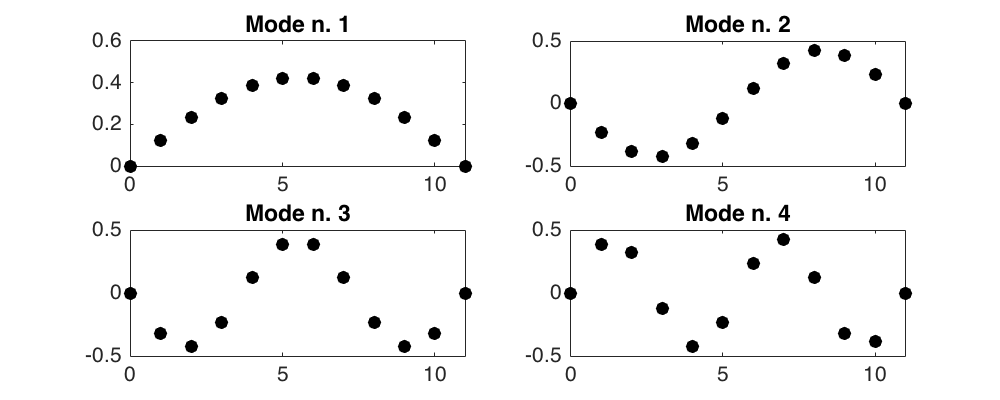

In [13]:
for II=1:4
subplot(2,2,II)
plot(0:N+1, V10(:,II), '.k', 'markersize', 22)
title(['Mode n. ', num2str(II, '%d')])
xlim([0, N+1])
end

### Array with 50 DOFs

Again, create the matrix $D$, calculate the eigenvectors and add the fixed masses.

In [14]:
N = 50;
D50 = createTridiag(N);
[V50,E50] = eig(D50);
V50 = [zeros(1,N); V50; zeros(1,N)];

... then plot the modes!

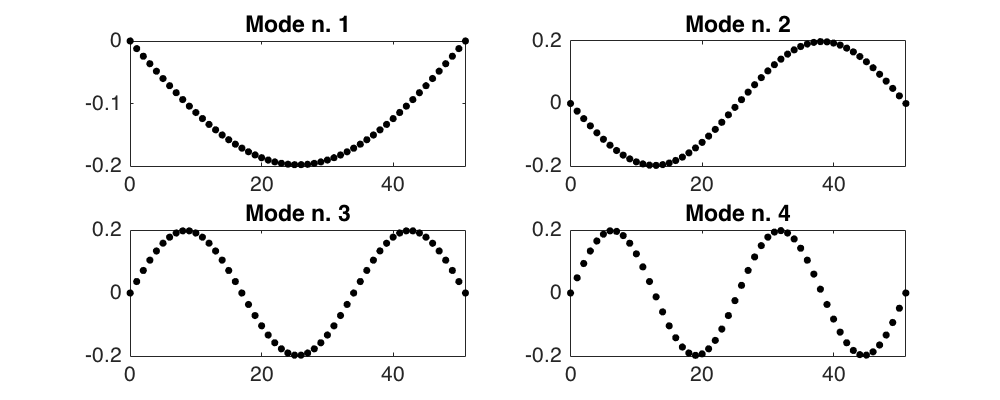

In [15]:
for II=1:4
subplot(2,2,II)
plot(0:N+1, V50(:,II), '.k', 'markersize', 20)
title(['Mode n. ', num2str(II, '%d')])
xlim([0, N+1])
end

## Results

![](files/w.png)
The modal shapes are sinusoids with a period that is an integer multiple of $L/2$, where $L$ is the string length.


![](files/w.png)
### These are the modes of a linear string!
----

_Confirm this by math calculation..._

See http://www.physics.usu.edu/riffe/3750/lecture_notes.htm, Lecture 5, for some help!

### Important comment


For a string, the vibration is transverse to the length of the string. In the case of the mass-spring system, the vibrations are along the chain of oscillators, as the next videos show.

In [16]:
%%html
<video style="display:block; margin: 0 auto;" width="1000" height="300" controls loop>
  <source src="files/N15_mode1.mp4" type="video/mp4">
</video>

In [17]:
%%html
<video style="display:block; margin: 0 auto;" width="1000" height="300" controls loop>
  <source src="files/N15_mode2.mp4" type="video/mp4">
</video>

In [18]:
%%html
<video style="display:block; margin: 0 auto;" width="1000" height="300" controls loop>
  <source src="files/N15_mode3.mp4" type="video/mp4">
</video>

In [19]:
%%html
<video style="display:block; margin: 0 auto;" width="1000" height="300" controls loop>
  <source src="files/N15_mode4.mp4" type="video/mp4">
</video>

## Frequencies of vibration

![](files/w.png)
From the eigenvalue equation $\, \Omega^2 \vec{U} = \omega^2 D \vec{U}, \,$ the frequencies are given by

<div class="warning">$$\frac{\Omega}{2\pi} = \frac{\omega}{2\pi} \sqrt{\text{eig}(D)}.$$ </div>


#### Frequencies of a string

They are integer multiples of the frequency of the first mode... think of a guitar string!

#### Find eigenvalues for N=30 and N=50

In [20]:
[V30, E30] = eig(createTridiag(30));
[V50, E50] = eig(createTridiag(50));

#### ... then normalise and sqrt

In [21]:
ev30 = diag(E30); ev50 = diag(E50);
y30 = sqrt(ev30/ev30(1)); y50 = sqrt(ev50/ev50(1));

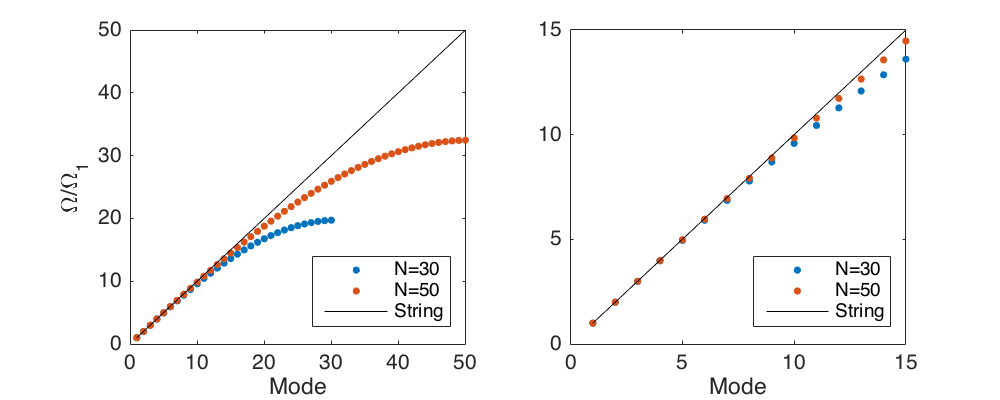

In [22]:
subplot(1,2,1), plot(y30,'.','markersize',20), hold on
plot(y50,'.','markersize',20), plot(1:50, 'k'), xlim([0, 50]), hold off
ylabel('\Omega/\Omega_1'), xlabel('Mode')
legend('N=30', 'N=50', 'String', 'location', 'best')
subplot(1,2,2), plot(y30,'.','markersize',20), hold on
plot(y50,'.','markersize',20), plot(1:50, 'k'), xlim([0, 15]), hold off
xlabel('Mode'), legend('N=30', 'N=50', 'String', 'location', 'best')

$$\Omega = \omega \sqrt{\text{eig}(D)}, \qquad \Omega_1 = \text{ fundamental}$$

## Key points

- Modal shapes are the same as those of a string (sinusoidal shapes)

- Frequencies of the oscillator system are "detuned" w.r.t. those of a string (difference dispersion relation)


# Sound synthesis applications

## Sound synthesis
- Diverse range of techniques (especially digital) to create sounds
    - Additive synthesis, Wavetable synthesis, AM and FM synthesis, etc.
    - Physical modelling

### Physical modelling
- Physical description of the instrument underlying the numerical algorithm
    - Lumped mass-spring networks (CORDIS-ANIMA by Cadoz et al.)
    - Modal synthesis (MOSAIC-Modalys at IRCAM, Paris)
    - Digital waveguides (J. Smith III, Stanford)
    - Time stepping methods

## Modal approach

### Back to the mass-spring system

The global solution to the equations of motion can be written as a linear combination of the solutions to the $N$ eigenvalue problems for the system. 

$$ \vec{u}(t) = \sum_1^N A_j \, \vec{U_j} \, sin(\Omega_j t + \phi_j)  $$ 

It requires, therefore, $N$ amplitudes and $N$ phases to be specified, one for each of the $N$ eigenmodes for the system. 

#### Create the eigenmodes

In [23]:
[V50, E50] = eig(createTridiag(50));
V50 = [zeros(1,50); V50; zeros(1,50) ];

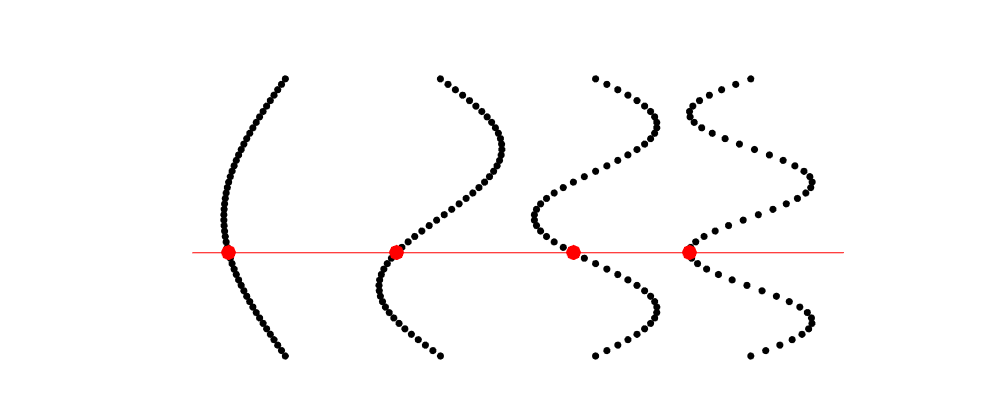

In [24]:
plot(V50(:,1), 0:N+1, 'k.', 'markersize', 20), 
hold on, plot(V50(20,1), 19, 'r.', 'markersize', 25)
plot(V50(:,2)+0.5, 0:N+1, 'k.', 'markersize', 20), plot(V50(20,2)+0.5, 19, 'r.', 'markersize', 25)
plot(V50(:,3)+1, 0:N+1, 'k.', 'markersize', 20), plot(V50(20,3)+1, 19, 'r.', 'markersize', 25)
plot(V50(:,4)+1.5, 0:N+1, 'k.', 'markersize', 20), plot(V50(20,4)+1.5, 19, 'r.', 'markersize', 25)
plot([-0.3, 1.8], [19, 19], 'r')
axis off

### Sound in Matlab

In [59]:
DT = 2;          % sound duration (in s)
t = (0:DT*44100)/44100;
y = sin(2*pi*t*440) + sin(2*pi*t*660);
soundsc(y , 44100 )

### How does the mass-spring system sound like?

#### Create system matrix $D$ and find the e.values

In [54]:
[V50,E50] = eig(createTridiag(50));
ev50 = sqrt(diag(E50));

#### Define $\omega$, amplitudes and phases

In [55]:
omega = 2*pi*440;
A = rand(50,1);
%A = (50:-1:1)'/50;
%A = (((1:50)-25).^2/25^2)';
phi = zeros(50,1);

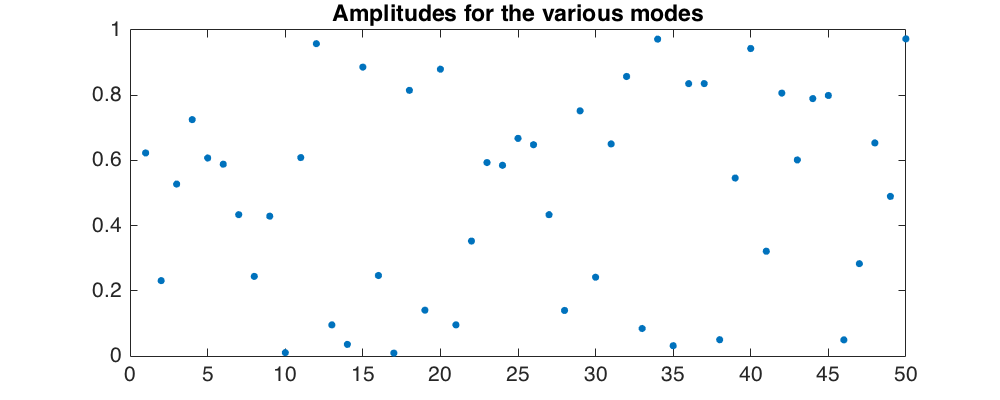

In [56]:
plot(A, '.', 'markersize', 20)
title('Amplitudes for the various modes')

#### Select a point and create the oscillators

In [29]:
pt = 23;

#### Create amplitudes for each point and individual sounds

In [60]:
% Create the argument of sine function
T = kron(omega*ev50, t) + kron(phi, ones(numel(t),1)');
 
Amps = V50(pt, :)'.*A;
snd = sparse(diag(Amps)) * sin(T); 

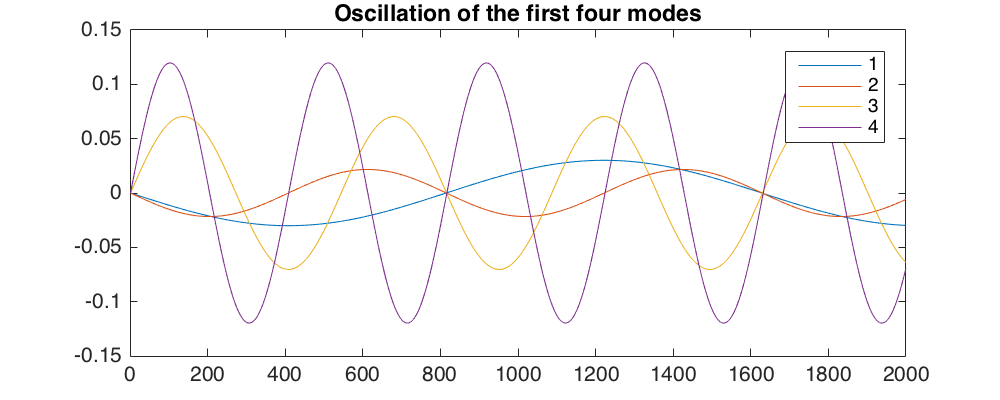

In [61]:
plot(snd(1,1:2000))
hold on, plot(snd(2,1:2000))
plot(snd(3,1:2000)), plot(snd(4,1:2000))
legend('1','2','3','4')
title('Oscillation of the first four modes')
hold off

### Plot the final signal

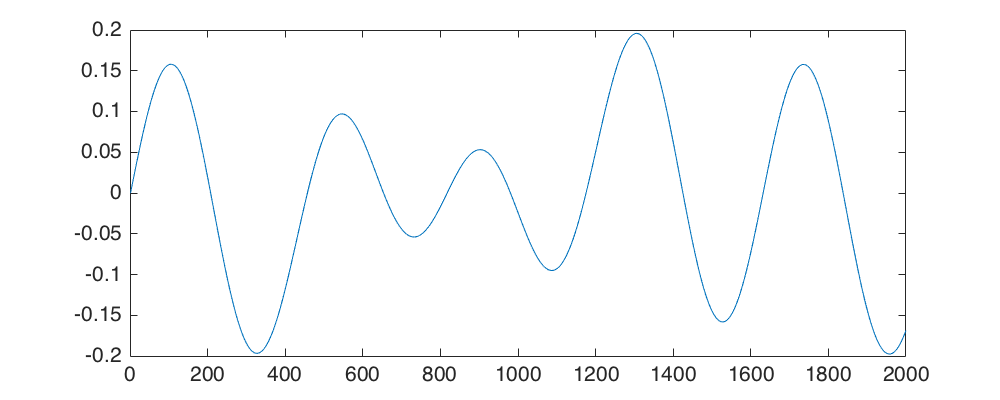

In [62]:
plot(snd(1,1:2000) + snd(2,1:2000) + snd(3,1:2000) + snd(4,1:2000))

### Let's play!

In [44]:
soundsc(sum(snd,1), 44100)

## Try the code yourself!

``MDoF_Modal.m``  $\,$ available at:  https://github.com/atorin/Dynamics3-Lecture

## Finite difference approach

### Discretise time

$$u(t) \quad \longrightarrow \quad u(nk) = u^n,$$ 

with $n$ integer and $k$ the time step.

### Recursions

Time differentiation becomes recursions: knowing $u^n$ you can calculate $u^{n+1}$.

### Second difference
$$ \ddot{u} \quad \longrightarrow \quad \frac{u^{n+1} - 2 u^n + u^{n-1}}{k^2}$$

Notice the pattern (1, -2, 1)...

### Equation for the mass-spring system

<div class="warning">

$$ M \frac{\vec{u}^{ n+1} - 2\vec{u}^{ n} + \vec{u}^{ n-1}}{k^2} = - \omega^2 D \vec{u}^n$$ </div>

## Try the code yourself!

``MDoF_FD.m``  $\,$ available at:  https://github.com/atorin/Dynamics3-Lecture

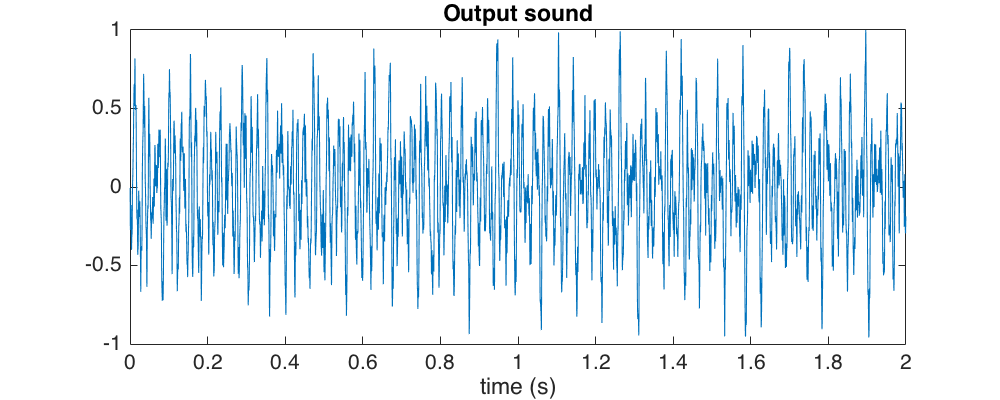

In [47]:
%for II=1:5
MDoF_FD 
%pause(rand)
%end

## Conclusions

- We discussed a general method to find the equations of motion of a mass-spring system

- We looked at the normal modes and frequencies in the case of large $N$, and compared them with those of a string

- We had some fun with basic sound synthesis techniques

# Thank you for your attention!
---
![](files/w.png)

### Alberto Torin

A.Torin@ed.ac.uk

Slides and Codes on Github:
http://github.com/atorin/Dynamics3-Lecture